# Linear Regression:

Data Description- 
The dataset that we have picked is from Airbnb. The dataset contains details for over 3723 Airbnb listings in the US. We will be using this dataset and building a regression model that best predicts the price of these listings based on the various features/variables.

We picked this dataset from kaggle. Please find the link to that for reference:
https://www.kaggle.com/krisinbentley/airbnb/

The dataset has about 92 columns, some of which are either redundant or not useful for predicting the price. Please find below the list of columns in the dataset:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview,	notes, transit, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, city	state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, license, jurisdiction_names, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month


# Initial Data Cleaning:

To begin with, we will first remove all the columns that we can see as being not useful in our prediction. 
We will remove the following columns:

id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, requires_license, license, jurisdiction_names, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})

In [2]:
#Read the csv file
df= pd.read_csv(os.path.expanduser("~/Downloads/airbnb.csv")) 

#Drop the columns that we are sure will not be of any use in the model
df = df.drop(columns= ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification','calculated_host_listings_count'])
df.head()

,transit,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,NaN,within a few hours,0.92,0.91,f,"3rd Street Southeast, Washington, DC 20003, Un...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
1,NaN,within a day,0.90,1.00,f,"11th Street Southeast, Washington, DC 20003, U...",Capitol Hill,"Capitol Hill, Lincoln Park",NaN,Washington,...,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,strict,2.11
2,NaN,within a day,0.90,1.00,f,"14th Place, Hyattsville, MD 20782, United States","Chillum, MD","Lamont Riggs, Queens Chapel, Fort Totten, Plea...",NaN,Hyattsville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1.00
3,NaN,within an hour,1.00,NaN,f,"O St, Washington, DC 20024, United States",NaN,"Southwest Employment Area, Southwest/Waterfron...",NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
4,You can walk to the bus stop (1 min) Subway AN...,within a few hours,0.92,0.67,f,"East-West Highway, Silver Spring, MD 20910, Un...","Silver Spring, MD","Colonial Village, Shepherd Park, North Portal ...",NaN,Silver Spring,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN


# Removing Redundant Columns

Now, after removing the unnecessary columns for prediction, we look for redundant columns (that describe same/similar features) and try to eliminate them to increase our prediction accuracy.

Following is the list of columns we find redundant/repetitive:

transit, host_acceptance_rate, host_is_superhost, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, weekly_price, monthly_price, security_deposit, cleaning_fee,  calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, square_feet, calendar_last_scraped,  first_review, last_review, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value,  instant_bookable, reviews_per_month


In [3]:
#Remove redundant columns
df = df.drop(columns= ['transit','host_acceptance_rate', 'host_is_superhost', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact','amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'extra_people', 'cleaning_fee',  'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'square_feet', 'calendar_last_scraped',  'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable','reviews_per_month'])
df.head()

,host_response_time,host_response_rate,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,Breakfast,Smoking Allowed,Buzzer/Wireless Intercom,Price,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy
0,within a few hours,0.92,Washington,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,False,False,False,160,1,1,1125,0,NaN,flexible
1,within a day,0.90,Washington,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,...,False,False,False,350,1,2,30,65,94.0,strict
2,within a day,0.90,Hyattsville,House,Private room,1,2.0,1.0,1.0,Real Bed,...,False,False,False,50,1,2,1125,1,NaN,flexible
3,within an hour,1.00,Washington,House,Private room,2,1.0,1.0,1.0,Real Bed,...,True,False,False,95,1,1,1125,0,NaN,flexible
4,within a few hours,0.92,Silver Spring,Townhouse,Entire home/apt,4,1.0,1.0,1.0,Real Bed,...,False,False,False,50,2,7,1125,0,NaN,flexible


# Selected Variables

For the linear regression model that we are building, 'Price' is our dependent variable.

Following are the list of independent variables.

host_response_time, host_response_rate, city, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, Kitchen, TV, Wireless Internet, Air Conditioning, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, First Aid Kit, Safety Card, Fire Extinguisher, Essentials, Shampoo, Parking, Pets, Indoor Fireplace, Carbon Monoxide Detector, Breakfast, Smoking Allowed, Buzzer/Wireless Intercom, guests_included, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, cancellation_policy

In [4]:
#List down all the columns
df.columns

Index(['host_response_time', 'host_response_rate', 'city', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning',
       'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy'],
      dtype='object')

# Exploratory Data Analysis

Plotting some visualizations to better understand the variables in our model and to also understand the variability between them.
First, we perform correlation to understand the dependency between each of these variables.
From the plot below, we can see that Price is highly correlated to beds, bedrooms, accommodates, bathrooms & guests included.

In [5]:
# Find all correlations and sort 
correlations_data = df.corr()['Price'].sort_values()

# Print the most negative correlations
print(correlations_data)

number_of_reviews          -0.084339
Smoke Detector             -0.076801
Pets                       -0.034881
Essentials                 -0.031995
host_response_rate         -0.028140
First Aid Kit              -0.022155
Breakfast                  -0.015742
Safety Card                -0.011072
Wireless Internet          -0.010852
Smoking Allowed            -0.009512
Heating                    -0.008235
Shampoo                    -0.003903
Carbon Monoxide Detector   -0.002285
Fire Extinguisher           0.000456
Buzzer/Wireless Intercom    0.009415
Air Conditioning            0.011326
minimum_nights              0.014055
maximum_nights              0.014744
Kitchen                     0.026549
Parking                     0.034325
review_scores_rating        0.050812
Dryer                       0.077383
Washer                      0.080124
TV                          0.106650
Indoor Fireplace            0.109555
Family/Kid Friendly         0.171228
guests_included             0.302968
b

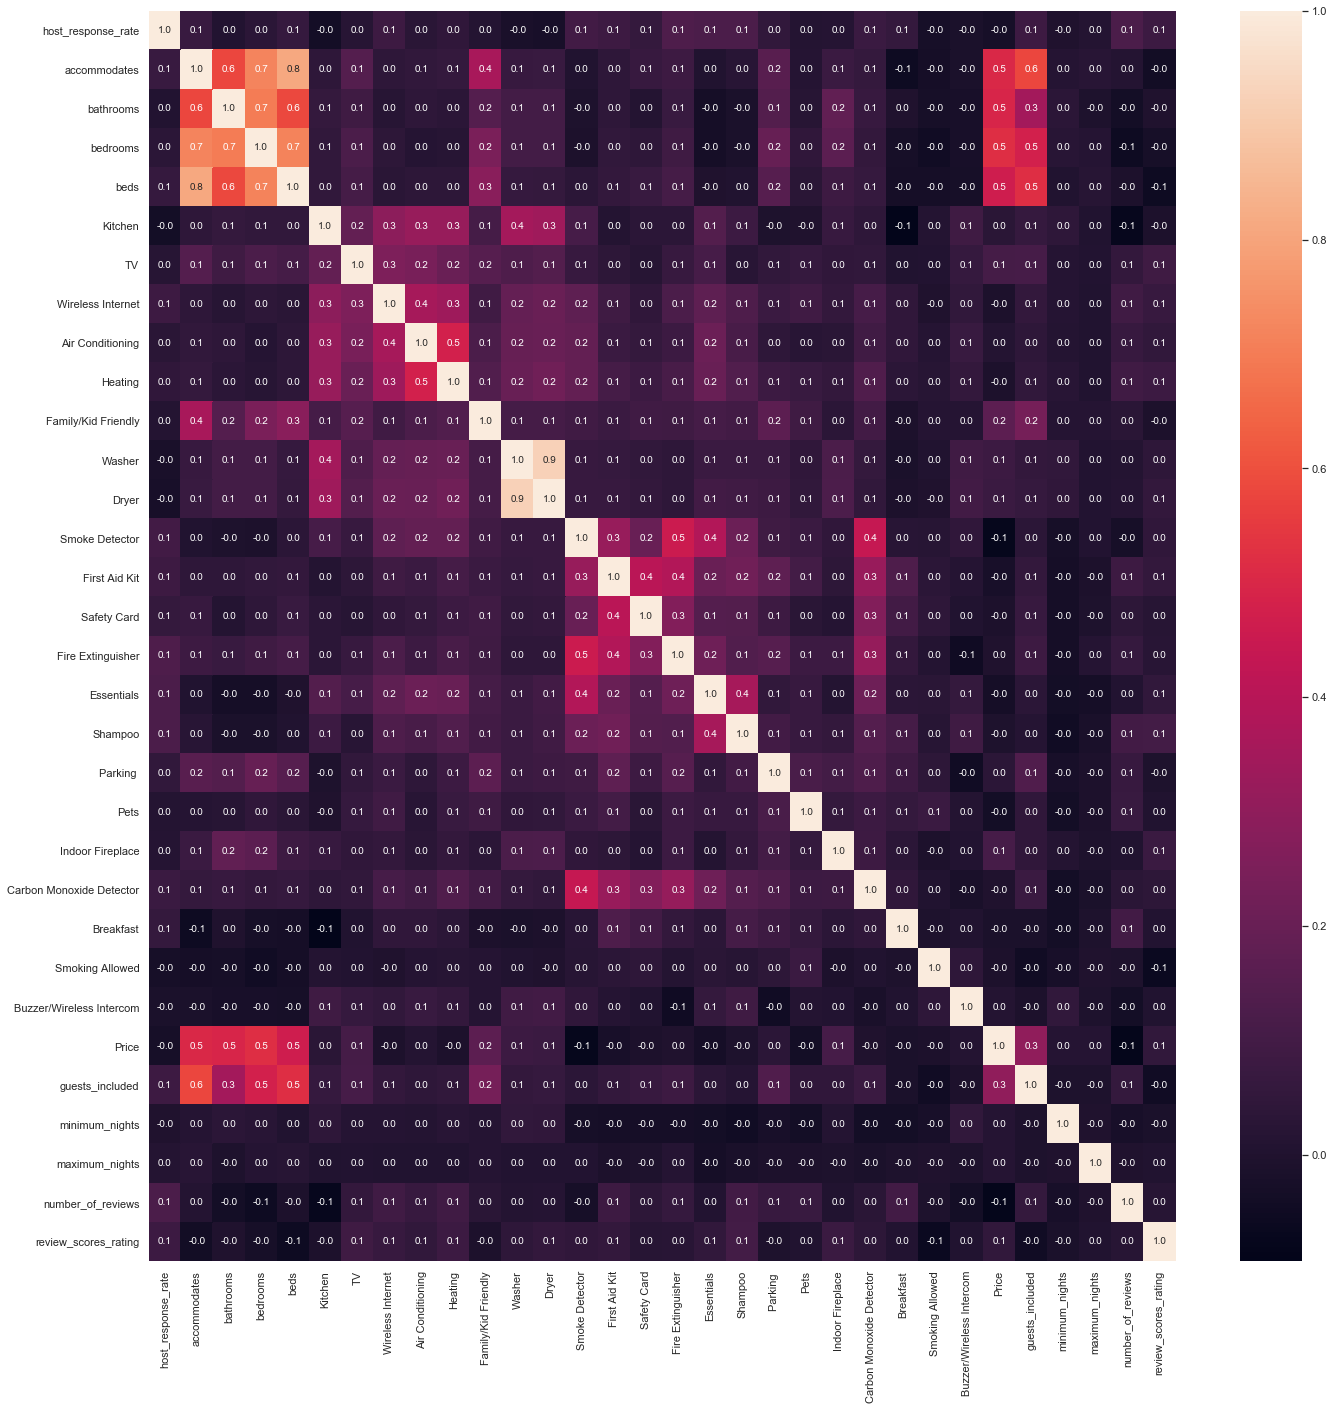

In [6]:
#we have plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)
f= plt.subplots(figsize=(23,23))
sns.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

Now, we will check how price varies with the variables that show the highest correlation with it.

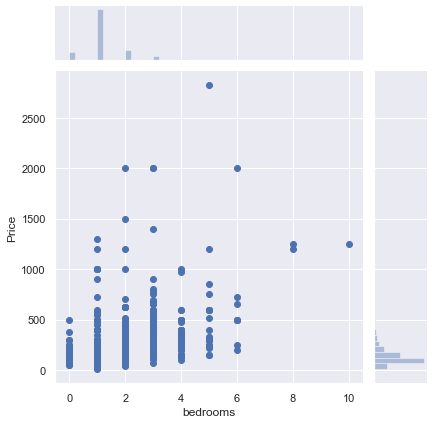

In [7]:
sns.jointplot('bedrooms','Price',data = df) #Price vs Bedrooms

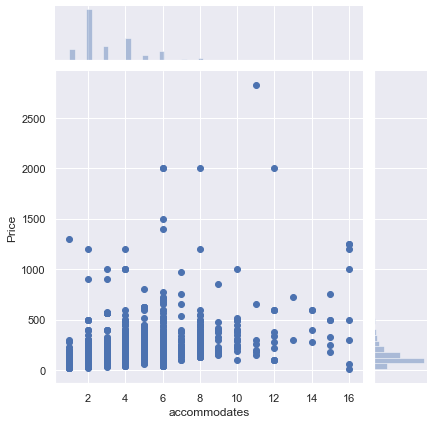

In [8]:
sns.jointplot('accommodates','Price',data = df) #Price vs Accommodates

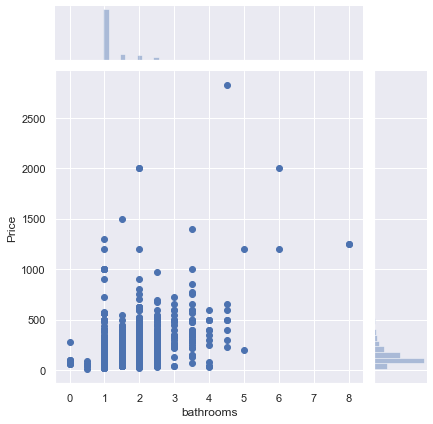

In [9]:
sns.jointplot('bathrooms','Price',data = df) #Price vs Bathrooms

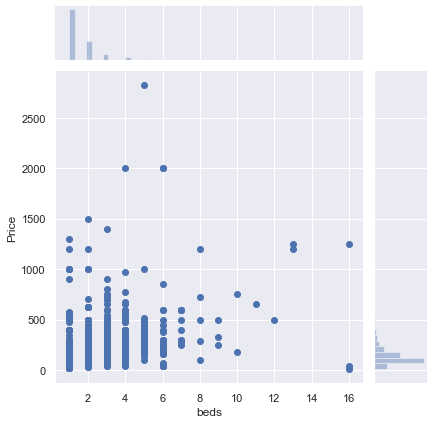

In [10]:
sns.jointplot('beds','Price',data = df) #Price vs Beds

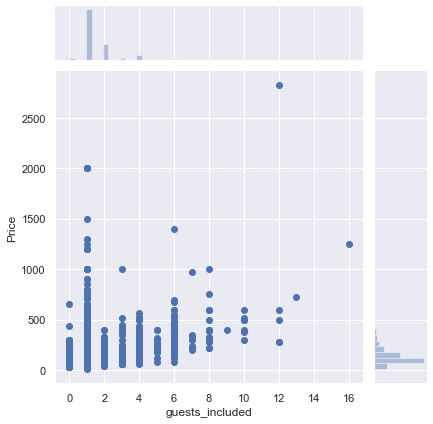

In [11]:
sns.jointplot('guests_included','Price',data = df) #Price vs Guests Included

# Categorical Variables

We need to first understand the distribution and behaviour of the categorical variables in the dataset to decide how to transform them.
For that, we will use the group by function to analyse the records based on host response time, city, property type, room type, bed type & cancellation policy. Based on the distribution of records in various categories, we will decide how to transform these variables.

In [12]:
df.groupby('host_response_time').size() #Check distribution of host response time

host_response_time
a few days or more      63
within a day           791
within a few hours    1159
within an hour        1276
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Host Response Time')

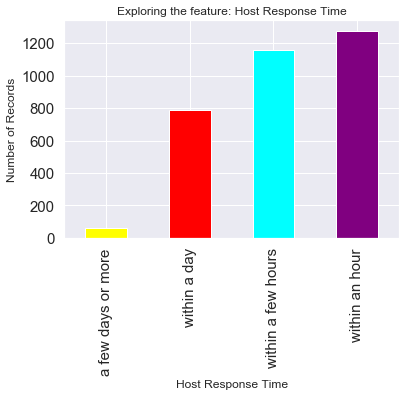

In [13]:
df.groupby(["host_response_time"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple'])
plt.xlabel('Host Response Time')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Host Response Time')

In [14]:
df.groupby('city').size() #Check distribution of cities

city
Adams Morgan                          1
Annapolis                             1
Arlington                             1
Capitol Heights                       1
Capitol Hill, Washington              1
Columbia Heights, middle of DC!       1
Dupont Circle                         1
Hyattsville                           2
Mount Rainier                         5
New York                              1
Silver Spring                         8
Takoma Park                           6
Washington                         3628
Washington                            2
Washington, D.C.                     63
chevy chase                           1
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: City')

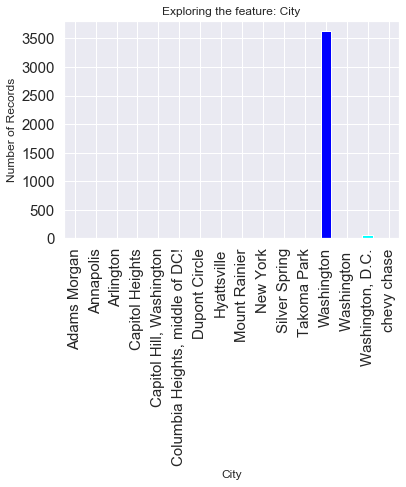

In [15]:
df.groupby(["city"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: City')

In [16]:
df.groupby('property_type').size() #Check distribution of property type

property_type
Apartment          2259
Bed & Breakfast      55
Boat                  2
Bungalow              1
Cabin                 1
Condominium          86
Dorm                  2
House              1210
Loft                 24
Other                12
Townhouse            70
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Property Type')

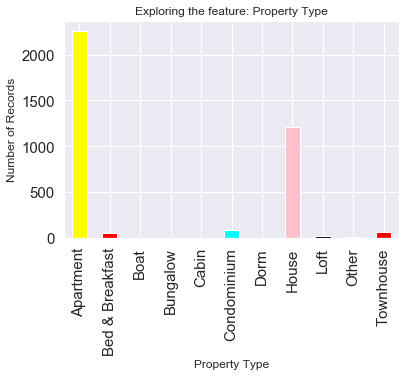

In [17]:
df.groupby(["property_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'green', 'blue','coral', 'cyan','purple','pink','black'])
plt.xlabel('Property Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Property Type')

In [18]:
df.groupby('room_type').size() #Check distribution of room type

room_type
Entire home/apt    2419
Private room       1202
Shared room         102
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Room Type')

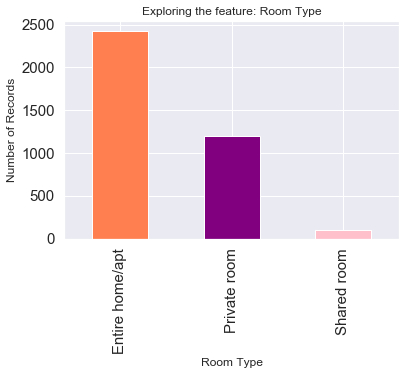

In [19]:
df.groupby(["room_type"]).size().plot(kind="bar",fontsize=15,color=['coral','purple','pink'])
plt.xlabel('Room Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Room Type')

In [20]:
df.groupby('bed_type').size() #Check distribution of bed type

bed_type
Airbed             37
Couch              13
Futon              55
Pull-out Sofa      48
Real Bed         3570
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Bed Type')

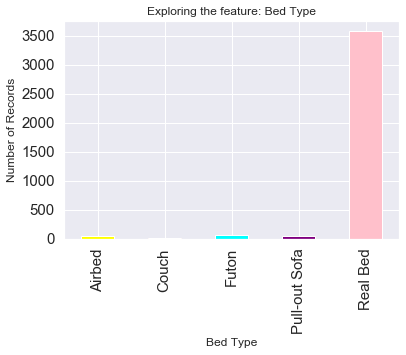

In [21]:
df.groupby(["bed_type"]).size().plot(kind="bar",fontsize=15,color=['yellow', 'red', 'cyan','purple','pink'])
plt.xlabel('Bed Type')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Bed Type')

In [22]:
df.groupby('cancellation_policy').size() #Check distribution of cancellation policy

cancellation_policy
flexible           1373
moderate           1099
strict             1189
super_strict_30      62
dtype: int64

Text(0.5, 1.0, 'Exploring the feature: Cancellation Policy')

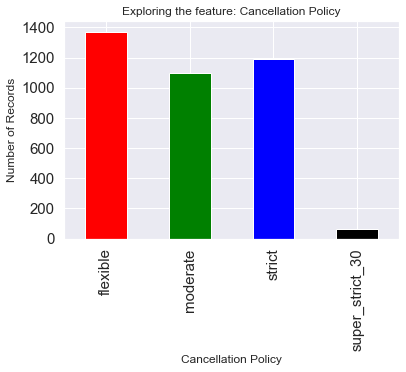

In [23]:
df.groupby(["cancellation_policy"]).size().plot(kind="bar",fontsize=15,color=['red', 'green', 'blue', 'black'])
plt.xlabel('Cancellation Policy')
plt.ylabel('Number of Records')
plt.title('Exploring the feature: Cancellation Policy')

Based on our analysis using the group by function. We decide on the following points:
- Based on the distribution of records, we will transform the host response time variable to have the following 3 categories: within an hour, within a few hours, within a day or more.
- Most of the listings are from Washington and we see some listings from other cities and so, we decide to transform the data in way that we have only 2 categories of city: Washington D.C. & Other.
- For property type, we see some irregularities and to deal with that we will transform the data to include only the following 3 categories of property type: Apartment, House & Other.
- For room type, the data seems fairly distributed and we will let these categories be as they are.
- For bed type, we see most of the listings are for real bed and and so, we decide to transform the data in way that we have only 2 categories of bed type: Real Bed & Other.
- For cancellation policy, the data seems fairly distributed and we will let these categories be as they are.

# Data Transformation

We will first transform our categorical variables based on the categories we defined in the previous step.
Next, we will convert all of them to binary variables using one hot vector. 
And in the end, we will be converting our boolean variables (All the amenities columns) to binary variables.

In [24]:
#Map all the host response time to within an hour, within a few hours, within a day or more.
df['host_response_time'] = df['host_response_time'].map({'a few days or more':'within a day or more', 'within a day':'within a day or more', 'within a few hours':'within a few hours', 'within an hour':'within an hour'})

#Verify the categories in host reponse time
df.groupby('host_response_time').size() 

host_response_time
within a day or more     854
within a few hours      1159
within an hour          1276
dtype: int64

In [25]:
#Map all the cities to either Washington, D.C. or Other
df['city'] = df['city'].map({'Adams Morgan':'Washington, D.C.', 'Annapolis':'Other', 'Arlington':'Other', 'Capitol Heights':'Other','Capitol Hill, Washington':'Washington, D.C.', 
                             'Columbia Heights, middle of DC!':'Washington, D.C.', 'Dupont Circle ':'Washington, D.C.', 'Hyattsville':'Other', 'Mount Rainier':'Other', 'New York':'Other', 
                             'Silver Spring':'Other', 'Takoma Park':'Other', 'Washington':'Washington, D.C.', 'Washington':'Washington, D.C.', 'chevy chase':'Other'})

#Verify the categories in city
df.groupby('city').size() 

city
Other                 26
Washington, D.C.    3631
dtype: int64

In [26]:
#Map all the property types to Apartment, House & Other.
df['property_type'] = df['property_type'].map({'Boat':'Other', 'Bungalow':'Other', 'Cabin':'Other', 'Dorm':'Other', 'Loft':'Other', 'Apartment':'Apartment','Bed & Breakfast':'Other','Condominium':'Other','House':'House','Townhouse':'Other','Other':'Other'})

#Verify the categories in property type
df.groupby('property_type').size() 

property_type
Apartment    2259
House        1210
Other         253
dtype: int64

In [27]:
#Map all the bed types to either Real Bed & Other
df['bed_type'] = df['bed_type'].map({'Airbed':'Other', 'Couch':'Other', 'Futon':'Other', 'Pull-out Sofa':'Other', 'Real Bed':'Real Bed'})

#Verify the categories in bed type
df.groupby('bed_type').size() 

bed_type
Other        153
Real Bed    3570
dtype: int64

In [28]:
#Converting response time to one hot vector
col1 = pd.get_dummies(df.host_response_time, prefix='Reponse_time')
del df['host_response_time']
df= pd.concat([df, col1], axis=1)

#Converting city to one hot vector
col2 = pd.get_dummies(df.city, prefix='City')
del df['city']
df= pd.concat([df, col2], axis=1)

#Converting property_type to one hot vector
col3 = pd.get_dummies(df.property_type, prefix='Property')
del df['property_type']
df= pd.concat([df, col3], axis=1)

#Converting room_type to one hot vector
col4 = pd.get_dummies(df.room_type, prefix='room')
del df['room_type']
df= pd.concat([df, col4], axis=1)

#Converting bed_type to one hot vector
col5 = pd.get_dummies(df.bed_type, prefix='bed')
del df['bed_type']
df= pd.concat([df, col5], axis=1)

#Converting cancellation_policy to one hot vector
col6 = pd.get_dummies(df.cancellation_policy, prefix='cancellation')
del df['cancellation_policy']
df= pd.concat([df, col6], axis=1)

#Convert all amenities to 0 & 1
df['Kitchen'] = df['Kitchen'].map({False:0, True:1})
df['TV'] = df['TV'].map({False:0, True:1})
df['Wireless Internet'] = df['Wireless Internet'].map({False:0, True:1})
df['Air Conditioning'] = df['Air Conditioning'].map({False:0, True:1})
df['Heating'] = df['Heating'].map({False:0, True:1})
df['Family/Kid Friendly'] = df['Family/Kid Friendly'].map({False:0, True:1})
df['Washer'] = df['Washer'].map({False:0, True:1})
df['Dryer'] = df['Dryer'].map({False:0, True:1})
df['Smoke Detector'] = df['Smoke Detector'].map({False:0, True:1})
df['First Aid Kit'] = df['First Aid Kit'].map({False:0, True:1})
df['Safety Card'] = df['Safety Card'].map({False:0, True:1})
df['Fire Extinguisher'] = df['Fire Extinguisher'].map({False:0, True:1})
df['Essentials'] = df['Essentials'].map({False:0, True:1})
df['Shampoo'] = df['Shampoo'].map({False:0, True:1})
df['Pets'] = df['Pets'].map({False:0, True:1})
df['Indoor Fireplace'] = df['Indoor Fireplace'].map({False:0, True:1})
df['Carbon Monoxide Detector'] = df['Carbon Monoxide Detector'].map({False:0, True:1})
df['Breakfast'] = df['Breakfast'].map({False:0, True:1})
df['Smoking Allowed'] = df['Smoking Allowed'].map({False:0, True:1})
df['Buzzer/Wireless Intercom'] = df['Buzzer/Wireless Intercom'].map({False:0, True:1})

df.head()

,host_response_rate,accommodates,bathrooms,bedrooms,beds,Kitchen,TV,Wireless Internet,Air Conditioning,Heating,...,Property_Other,room_Entire home/apt,room_Private room,room_Shared room,bed_Other,bed_Real Bed,cancellation_flexible,cancellation_moderate,cancellation_strict,cancellation_super_strict_30
0,0.92,4,1.0,1.0,2.0,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1,0.90,6,3.0,3.0,3.0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2,0.90,1,2.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
3,1.00,2,1.0,1.0,1.0,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
4,0.92,4,1.0,1.0,1.0,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,0


In [29]:
df.shape #Check the number of rows & columns in the dataset

(3723, 49)

# Understanding the Data

We start by understanding the columns and data types of all columns before we finally start building our model.

In [30]:
df.info() #Check the datatype for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
host_response_rate                   3289 non-null float64
accommodates                         3723 non-null int64
bathrooms                            3696 non-null float64
bedrooms                             3702 non-null float64
beds                                 3712 non-null float64
Kitchen                              3723 non-null int64
TV                                   3723 non-null int64
Wireless Internet                    3723 non-null int64
Air Conditioning                     3723 non-null int64
Heating                              3723 non-null int64
Family/Kid Friendly                  3723 non-null int64
Washer                               3723 non-null int64
Dryer                                3723 non-null int64
Smoke Detector                       3723 non-null int64
First Aid Kit                        3723 non-null int64
Safety Card                   

In [31]:
df.columns #Checking the columns we are using in the model

Index(['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'Kitchen', 'TV', 'Wireless Internet', 'Air Conditioning', 'Heating',
       'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector',
       'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace',
       'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed',
       'Buzzer/Wireless Intercom', 'Price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'Reponse_time_within a day or more',
       'Reponse_time_within a few hours', 'Reponse_time_within an hour',
       'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
       'Property_House', 'Property_Other', 'room_Entire home/apt',
       'room_Private room', 'room_Shared room', 'bed_Other', 'bed_Real Bed',
       'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict',
       'cancellation

# Data Imputation

Now, we check for null values in our datset and try to eliminate them. We replace all the missing values with the mean for each column.

In [32]:
#Resetting the index to eliminate any infinite values
df = df.reset_index()

#Defining our dependent and independent variables 
X = df[['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 
        'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 
        'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 
        'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more',
        'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
        'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 
        'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30']]
y = df['Price']

In [33]:
X.isna().sum()

host_response_rate                   434
accommodates                           0
bathrooms                             27
bedrooms                              21
beds                                  11
Kitchen                                0
TV                                     0
Wireless Internet                      0
Air Conditioning                       0
Heating                                0
Family/Kid Friendly                    0
Washer                                 0
Dryer                                  0
Smoke Detector                         0
First Aid Kit                          0
Safety Card                            0
Fire Extinguisher                      0
Essentials                             0
Shampoo                                0
Parking                                0
Pets                                   0
Indoor Fireplace                       0
Carbon Monoxide Detector               0
Breakfast                              0
Smoking Allowed 

In [34]:
X = X.fillna(X.mean()) 
X.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

# Split the data

Now we will split the data into training and test sets. We will keep 75% of the data to train the model and keep 25% of the data to test the model that we build

In [35]:
#Split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

#Check the number of records in training and test partitions
print("X_train unscaled : " + str(X_train_org.shape))
print("X_test unscaled: " + str(X_test_org.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train unscaled : (2792, 48)
X_test unscaled: (931, 48)
y_train : (2792,)
y_test : (931,)


# Data Scaling

In [36]:
#Standardize the training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2792, 48)
X_test : (931, 48)
y_train : (2792,)
y_test : (931,)


### Best Parameters for Models:
We will use the best parameters that we established in Project 1, to build our Ensemble Learning Models. Following are the list of best parameters that we established for all the models:

<img src="best_model.png">

## 1) Bagging 

### 1.A) Bagging with KNN Regressor

Using the best paramerters from Project 1 KNN Regressor Model as - {'n_neighbors':11,'weights':'distance'}

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#KNeighborsRegressor with Bagging
bag_reg1 = BaggingRegressor(KNeighborsRegressor(n_neighbors= 11, weights= 'distance'),max_features=12,  n_estimators=500, random_state=0, bootstrap = True)
bag_reg1.fit(X_train, y_train)
yPredictionreg1 = bag_reg1.predict(X_test)

#Printing Results
print("Traing Score:",bag_reg1.score(X_train, y_train))
print("Test Score:",bag_reg1.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, yPredictionreg1))
print('MSE:', metrics.mean_squared_error(y_test, yPredictionreg1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPredictionreg1)))
print("r2_Score:",r2_score(y_test, yPredictionreg1))

Traing Score: 0.7611521260663482
Test Score: 0.34204051337983343

MAE: 46.046161404797715
MSE: 9088.838638354471
RMSE: 95.33540076149295
r2_Score: 0.34204051337983343


### 1.B) Bagging with LinearSVR Regressor
Using the best paramerters from Project 1 LinearSVR Regression Model as - {'C':10}

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#LinearSVR Regressor with Bagging
lsvr_bag=LinearSVR(C=10)
bag_reg1 = BaggingRegressor(lsvr_bag,max_features=7,  n_estimators=300, random_state=0, bootstrap = True)
bag_reg1.fit(X_train, y_train)
yPred_bag_lsvr= bag_reg1.predict(X_test)

#Printing Results
print("Traing Score:",bag_reg1.score(X_train, y_train))
print("Test Score:",bag_reg1.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, yPred_bag_lsvr))
print('MSE:', metrics.mean_squared_error(y_test, yPred_bag_lsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPred_bag_lsvr)))
print("r2_Score:",r2_score(y_test, yPred_bag_lsvr))

Traing Score: 0.1471699792460398
Test Score: 0.16200495514331825

MAE: 49.80236722312897
MSE: 11575.791363032462
RMSE: 107.59085166979794
r2_Score: 0.16200495514331825


## 2) Pasting

### 2.A) Pasting with KNN Regressor
Using the best paramerters from Project 1 KNN Regressor Model as - {'n_neighbors':11, 'weights':'distance'}

In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#KNN Regressor with Pasting
bag_reg3 = BaggingRegressor(KNeighborsRegressor(n_neighbors= 11, weights= 'distance'), max_features=12, n_estimators=100, random_state=0, bootstrap = False)
bag_reg3.fit(X_train, y_train)
yPredictionreg34 = bag_reg3.predict(X_test)

#Printing Results
print("Traing Score:",bag_reg3.score(X_train, y_train))
print("Test Score:",bag_reg3.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, yPredictionreg34))
print('MSE:', metrics.mean_squared_error(y_test, yPredictionreg34))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPredictionreg34)))
print("r2_Score:",r2_score(y_test, yPredictionreg34))

Traing Score: 0.8632834570457523
Test Score: 0.35018757725400584

MAE: 45.21854174488761
MSE: 8976.297744219653
RMSE: 94.74332559193631
r2_Score: 0.35018757725400584


### 2.B) Pasting with SGD Regressor
Using the best paramerters from Project 1 SGD Regressor Model as - {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'max_iter': 10000, 'penalty': 'l1', 'tol': 0.0001}

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#SGDRegressor with Pasting
sgd = SGDRegressor(alpha= 0.0001, learning_rate= 'optimal',
                   loss= 'epsilon_insensitive', max_iter= 10000,
                   penalty= 'l1', tol= 0.0001)
bag_reg_sgd = BaggingRegressor(sgd, max_features=29, n_estimators=100, random_state=0, bootstrap = False)
bag_reg_sgd.fit(X_train, y_train)
yPred_past_sgd= bag_reg_sgd.predict(X_test)

#Printing Results
print("Traing Score:",bag_reg_sgd.score(X_train, y_train))
print("Test Score:",bag_reg_sgd.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, yPred_past_sgd))
print('MSE:', metrics.mean_squared_error(y_test, yPred_past_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPred_past_sgd)))
print("r2_Score:",r2_score(y_test, yPred_past_sgd))

Traing Score: 0.311850185577374
Test Score: 0.3116390162466164

MAE: 42.51638206432867
MSE: 9508.79504513506
RMSE: 97.5130506400813
r2_Score: 0.3116390162466164


### 2.C) Pasting with Decision Tree Regressor
By Plotting the graph for Decision Tree Regressor we get best parameter as - {'max_depth': 9}

Text(0, 0.5, 'Scores')

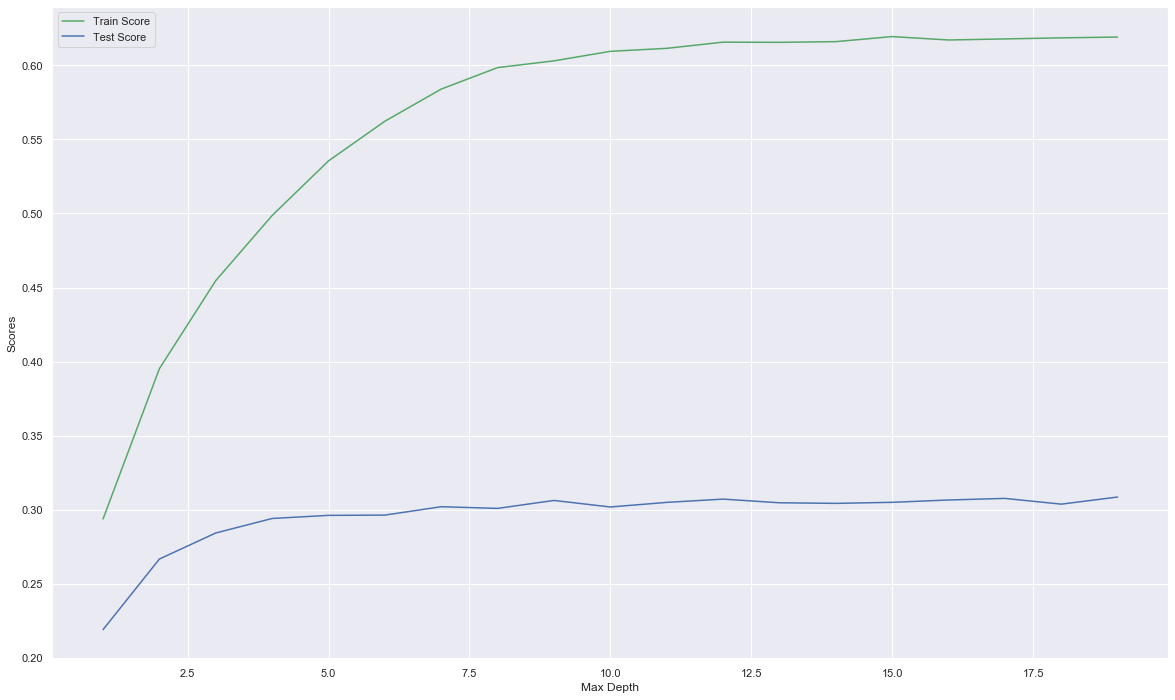

In [41]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,20):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')


In [42]:
#DecisionTreeRegressor with Pasting
dt_reg = DecisionTreeRegressor(max_depth=9,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

#Printing Results
print('Train score:',bag_reg_dt.score(X_train, y_train))
print('Test score:',bag_reg_dt.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_Score:",r2_score(y_test, y_pred))

Train score: 0.6029581204257344
Test score: 0.3064321111055225

MAE: 46.67585980599646
MSE: 9580.721541515135
RMSE: 97.88116029918697
r2_Score: 0.3064321111055225


## 3) ADABoost Regressor

### 3.A) ADABoost regressor with Linear SVR
Using the best paramerters from Project 1 LinearSVR Regression Model as - {'C':10}

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lsvr = LinearSVR(C=10)
adabst=AdaBoostRegressor(lsvr,n_estimators=3, random_state=0)
adabst.fit(X_train, y_train)

confidence = adabst.score(X_test, y_test)
c1 =adabst.score(X_train, y_train)
y_prediction_lsvr=adabst.predict(X_test)

print("Test score", confidence)
print("Train score", c1)
print()
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction_lsvr))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction_lsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction_lsvr)))
print("r2_Score:",r2_score(y_test, y_prediction_lsvr))

Test score 0.33606924634479873
Train score 0.38583823713875454

MAE: 45.47881754644251
MSE: 9171.323781667385
RMSE: 95.76702867724039
r2_Score: 0.33606924634479873


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3.B) ADABoost regressor with SVM (kernel = 'poly')
Using the best paramerters from Project 1 SVM Regressor with kernel=poly as - {'C':0.001, 'gamma':0.001, 'epsilon':0.5}

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

svr2=SVR(kernel='poly',C= 0.001, gamma=0.001, epsilon=0.5)
adabst=AdaBoostRegressor(svr2,n_estimators=7, random_state=0)
adabst.fit(X_train, y_train)

confidence = adabst.score(X_test, y_test)
c1 =adabst.score(X_train, y_train)
y_prediction_svrs=adabst.predict(X_test)

print("Test score", confidence)
print("Train score", c1)
print()
print('MAE:', metrics.mean_absolute_error(y_test,y_prediction_svrs))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction_svrs))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction_svrs)))
print("r2_Score:",r2_score(y_test, y_prediction_svrs))

Test score -0.03735506550617562
Train score -0.04359663286587546

MAE: 61.61707429641027
MSE: 14329.685934763575
RMSE: 119.70666620854318
r2_Score: -0.03735506550617562


### 3.C) ADABoost regressor with SVM (kernel = 'rbf')
Using the best paramerters from Project 1 SVM Regressor with kernel=rbf as - {'C':10, 'gamma':0.1, 'epsilon':0.5}

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

svr3=SVR(kernel='rbf',C= 10, gamma=0.1, epsilon=0.5)
adabst=AdaBoostRegressor(svr3,n_estimators=6, random_state=0)
adabst.fit(X_train, y_train)

confidence = adabst.score(X_test, y_test)
c1 =adabst.score(X_train, y_train)
y_prediction_svr_rbf=adabst.predict(X_test)

print("Train score", c1)
print("Test score", confidence)
print()
print('MAE:', metrics.mean_absolute_error(y_test,y_prediction_svr_rbf))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction_svr_rbf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction_svr_rbf)))
print("r2_Score:",r2_score(y_test, y_prediction_svr_rbf))

Train score 0.18599628902891463
Test score 0.10051066289309485

MAE: 53.26939047884818
MSE: 12425.253542403314
RMSE: 111.46862133534852
r2_Score: 0.10051066289309485


## 4) Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=10, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)
yPrediction_gbr = gbrt.predict(X_test)
print("Train Score:",gbrt.score(X_train, y_train))
print("Test Score:",gbrt.score(X_test, y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction_gbr))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction_gbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction_gbr)))
print("r2_Score:",r2_score(y_test, yPrediction_gbr))

Train Score: 0.6927553228595416
Test Score: 0.30849749189193054

MAE: 49.325658193968
MSE: 9552.191042181734
RMSE: 97.73531113257754
r2_Score: 0.30849749189193054


## 5) Regression Using PCA

In [47]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train1 = sc.fit_transform(X_train)  
X_test1 = sc.transform(X_test)

In [48]:
#Applying PCA on train and test
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
X_train_pca_reg= pca.fit_transform(X_train1)  
X_test_pca_reg = pca.transform(X_test1)

In [49]:
X_train_pca_reg.shape
X_test_pca_reg.shape

(931, 2)

In [50]:
#Loading Libraries
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict


### 5.A) KNN regressor using PCA

Text(0, 0.5, 'MSE')

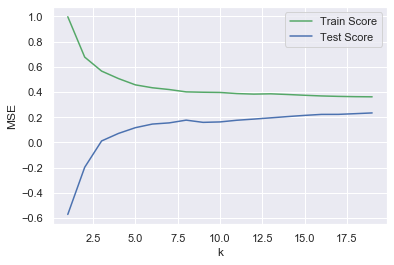

In [51]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca_reg, y_train)
    train_score_array.append(knn_reg.score(X_train_pca_reg, y_train))
    test_score_array.append(knn_reg.score(X_test_pca_reg, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [52]:
# we will now use grid search and cross-validation to get the best parameters
from sklearn import neighbors

params = {'n_neighbors':range(1,20),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train_pca_reg,y_train)
model.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 19, 'weights': 'uniform'}

In [53]:
#Building a KNN Regressor model using Best Parameters
knn_reg1 = KNeighborsRegressor(n_neighbors=19, weights='uniform')
knn_reg1.fit(X_train_pca_reg, y_train)

print("Train Score:",knn_reg1.score(X_train_pca_reg, y_train))
print("Test Score:",knn_reg1.score(X_test_pca_reg, y_test))
yPred1_pca_reg = knn_reg1.predict(X_test_pca_reg)
print()
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, yPred1_pca_reg))
print('MSE:', metrics.mean_squared_error(y_test, yPred1_pca_reg))
print("r2_Score:",r2_score(y_test, yPred1_pca_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPred1_pca_reg)))

Train Score: 0.36222255248067126
Test Score: 0.23440045033847223

MAE: 51.45655492113743
MSE: 10575.743506966863
r2_Score: 0.23440045033847223
RMSE: 102.8384339970561


In [54]:
from sklearn import neighbors

#Cross validation with the best knn model
knr = KNeighborsRegressor(n_neighbors = 19, weights = 'uniform')
knr.fit(X_train_pca_reg, y_train)
y_pred_knn=knr.predict(X_test_pca_reg)

# Cross Validation
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))

Cross-validation training scores (5-fold): [0.4189619  0.16503589 0.2931676  0.41394347 0.30666859]
Cross-validation testing scores (5-fold): [0.50558794 0.42431095 0.29990633 0.43386486 0.08522039]
Mean cross-validation training score (5-fold): 0.3196
Mean cross-validation testing score (5-fold): 0.3498
RMSE: 102.8384


### 5.B) Linear regression using PCA

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lreg = LinearRegression()
lreg.fit(X_train_pca_reg, y_train)
yPrediction_pca_reg = lreg.predict(X_test_pca_reg)

print('Train score:',lreg.score(X_train_pca_reg, y_train))
print('Test score:',lreg.score(X_test_pca_reg, y_test))
print("")
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction_pca_reg))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction_pca_reg))
print("r2_Score:",r2_score(y_test, yPrediction_pca_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction_pca_reg)))

Train score: 0.253972854264633
Test score: 0.21836255007219918

MAE: 56.16247220963803
MSE: 10797.28585202363
r2_Score: 0.21836255007219918
RMSE: 103.90998918305992


In [56]:
# Cross Validation with linear Regression
cv_scores = cross_val_score(lreg, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(lreg, X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,yPrediction_pca_reg))))

Cross-validation training scores (5-fold): [0.33414023 0.13432724 0.25662506 0.31021534 0.14672683]
Cross-validation testing scores (5-fold): [0.42849645 0.43019151 0.28725525 0.31942411 0.08321368]
Mean cross-validation training score (5-fold): 0.2364
Mean cross-validation testing score (5-fold): 0.3097
RMSE: 103.9100


Text(0.5, 0, 'RM')

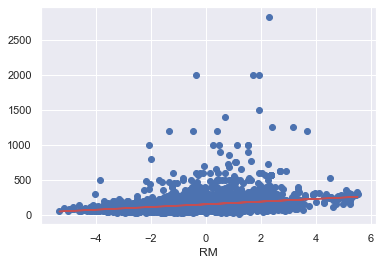

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_pca_reg[:,1].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

### 5.C) SGD regressor using PCA

In [58]:
from sklearn.linear_model import SGDRegressor

#SGD Model with Grid Search for best parameters
sgd = SGDRegressor()
param = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter':[10000],
    'tol': [0.0001]
}

cl = GridSearchCV(sgd, param, cv=3)
cl.fit(X_train_pca_reg, y_train)
print("Train score: " + str(cl.best_score_))
cl.fit(X_test_pca_reg, y_test)
print("Test score: " + str(cl.best_score_))
print(cl.best_params_)
SGD = cl.best_params_
yPredSGD=cl.predict(X_test_pca_reg)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train score: 0.2671396401484929


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Test score: 0.2813604264346616
{'alpha': 0.1, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 10000, 'penalty': 'l2', 'tol': 0.0001}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
from sklearn.linear_model import SGDRegressor

#Model with Best Parameters
sgd = SGDRegressor(alpha= 0.1, learning_rate= 'invscaling', loss= 'squared_loss', max_iter= 10000, penalty= 'l2', tol= 0.0001)
sgd.fit(X_train_pca_reg, y_train)
pred_sgd = sgd.predict(X_test_pca_reg)

print('Train score: {}'.format(sgd.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(sgd.score(X_test_pca_reg,y_test)))
print()
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, pred_sgd))
print('MSE:', metrics.mean_squared_error(y_test, pred_sgd))
print("r2_Score:",r2_score(y_test, pred_sgd))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_sgd))))

Train score: 0.229155043323771
Test score: 0.13558673997498816

MAE: 62.8053151432471
MSE: 11940.724006547784
r2_Score: 0.13558673997498816
RMSE: 109.2736


In [60]:
# SGD Cross Validation
cv_scores = cross_val_score(sgd, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(sgd,X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_sgd))))

Cross-validation training scores (5-fold): [0.32870417 0.12243525 0.25188427 0.31762242 0.16494334]
Cross-validation testing scores (5-fold): [0.4276447  0.42580887 0.27652294 0.32139276 0.08377587]
Mean cross-validation training score (5-fold): 0.2371
Mean cross-validation testing score (5-fold): 0.3070
RMSE: 109.2736


### 5.D) Ridge regression with PCA

In [61]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca_reg,y_train)
    train_score_list.append(ridge.score(X_train_pca_reg,y_train))
    test_score_list.append(ridge.score(X_test_pca_reg, y_test))

In [62]:
print(train_score_list)
print(test_score_list)

[0.2539728542644517, 0.25397285424651295, 0.253972852452908, 0.25397267337388263, 0.2539550433015051]
[0.2183626717944288, 0.2183637672615225, 0.218374718668513, 0.21848390682784613, 0.21954367533378216]


Text(0.5, 0, '$\\alpha$')

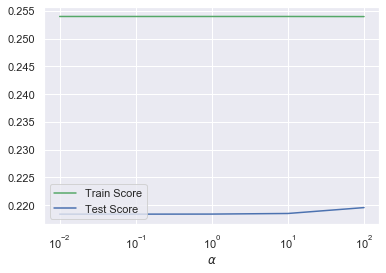

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [64]:
# Using GridSearchCV to find the best alpha

ridge = Ridge()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train_pca_reg, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.4f}'.format(grid_search.best_score_))
Ridgebest = grid_search.best_params_

Best parameters{'alpha': 1000}
Best score 0.2383


In [65]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from math import sqrt

#Model with best parameter
ridge = Ridge(alpha = 1000)
ridge.fit(X_train_pca_reg,y_train)

y_pred_pca_reg=ridge.predict(X_test_pca_reg)

print('Train score:',ridge.score(X_train_pca_reg, y_train))
print('Test score:',ridge.score(X_test_pca_reg, y_test))
print("")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pca_reg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pca_reg))
print("r2_Score:",r2_score(y_test, y_pred_pca_reg))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_pca_reg))))

Train score: 0.25243736854098653
Test score: 0.22735453385245374

MAE: 55.12468387507435
MSE: 10673.073508742053
r2_Score: 0.22735453385245374
RMSE: 103.3106


In [66]:
# Cross Validation
cv_scores = cross_val_score(ridge, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(ridge, X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_pca_reg))))

Cross-validation training scores (5-fold): [0.33582151 0.15058414 0.24293762 0.29993637 0.16245143]
Cross-validation testing scores (5-fold): [0.40498714 0.39342748 0.2633618  0.30163069 0.08081578]
Mean cross-validation training score (5-fold): 0.2383
Mean cross-validation testing score (5-fold): 0.2888
RMSE: 103.3106


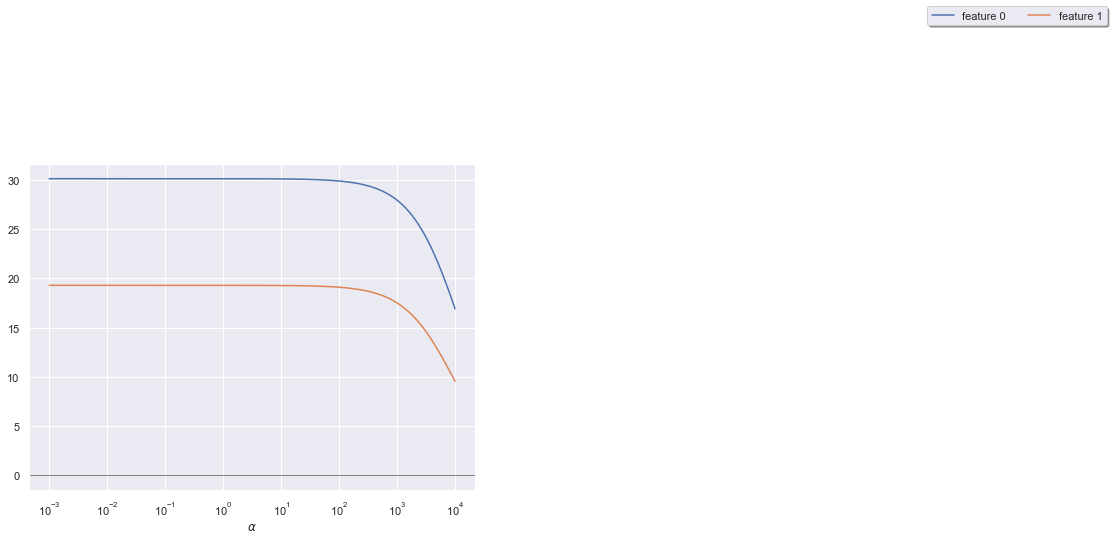

In [67]:
#Feature Selection

sns.set(rc={'figure.figsize':(8,6)})
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca_reg,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,2):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.rcParams["figure.figsize"] = (6,4)
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(2, 1.5),
          ncol=6, fancybox=True, shadow=True)
plt.show()

### 5.E) Lasso Regression with PCA

In [68]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca_reg,y_train)
    train_score_list.append(lasso.score(X_train_pca_reg,y_train))
    test_score_list.append(lasso.score(X_test_pca_reg, y_test))

In [69]:
print(train_score_list)
print(test_score_list)

[0.25397285192868624, 0.25397262066995774, 0.2539494947971036, 0.2516369075117064, 0.09219122499742194]
[0.2183755443242058, 0.2184921867463967, 0.2196283322271403, 0.22796191291805334, 0.09768486748831005]


Text(0.5, 0, '$\\alpha$')

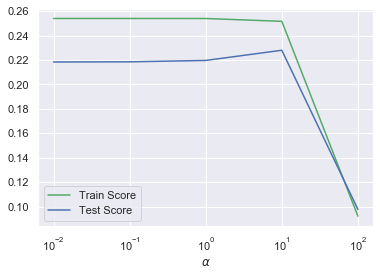

In [70]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

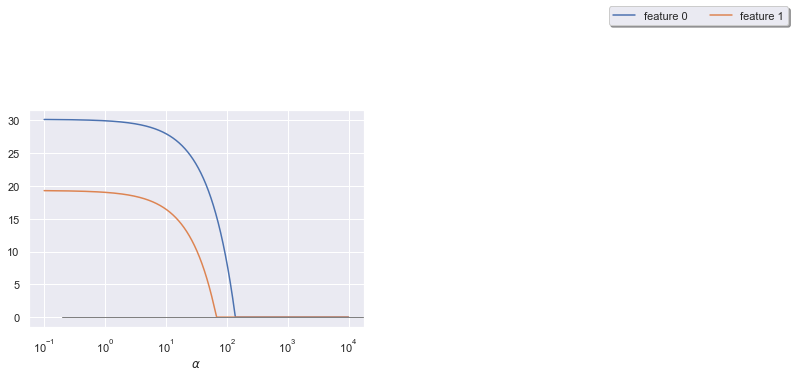

In [71]:
%matplotlib inline

x_range1 = np.linspace(0.1, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 100000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca_reg,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,2):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.1, xmax=99999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(2, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [72]:
# Grid Search for Algorithm Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
param_grid = {
    'alpha': [100,10,2,1,0.5,0.1,0.01,0.001],
    'max_iter': [10e5]
    
}
# create and fit a lasso regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_pca_reg, y_train)
yPredictions3 =grid.predict(X_test_pca_reg)


# summarize the results of the grid search
print ("Train Score:",grid.score(X_train_pca_reg, y_train))
print ("Test Score :",grid.score(X_test_pca_reg, y_test))
print("Best_Value_For_Alpha:",grid.best_params_)

Train Score: 0.2516369075117064
Test Score : 0.22796191291805334
Best_Value_For_Alpha: {'alpha': 10, 'max_iter': 1000000.0}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [73]:
from sklearn.model_selection import GridSearchCV

#ridge regression model with best parameters
grid1 = Lasso(alpha=10, max_iter= 1000000.0)
grid1.fit(X_train_pca_reg, y_train)
yPred2_pca_reg =grid1.predict(X_test_pca_reg)
print("")
print("Train Score:",grid1.score(X_train_pca_reg,y_train))
print("Test Score:",grid1.score(X_test_pca_reg,y_test))
print()
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, yPred2_pca_reg))
print('MSE:', metrics.mean_squared_error(y_test, yPred2_pca_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPred2_pca_reg)))
print("r2_Score:",r2_score(y_test, yPred2_pca_reg))


Train Score: 0.2516369075117064
Test Score: 0.22796191291805334

MAE: 54.99021306050991
MSE: 10664.683371610803
RMSE: 103.26995386660538
r2_Score: 0.22796191291805334


In [74]:
# Cross Validation
cv_scores = cross_val_score(grid1, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(grid1, X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,yPred2_pca_reg))))

Cross-validation training scores (5-fold): [0.33479016 0.14808145 0.24224039 0.300376   0.16084961]
Cross-validation testing scores (5-fold): [0.4283124  0.41730152 0.2807859  0.30870445 0.08317445]
Mean cross-validation training score (5-fold): 0.2373
Mean cross-validation testing score (5-fold): 0.3037
RMSE: 103.2700


### 5.F) SVR Linear with PCA

In [75]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train_pca_reg, y_train)
y_pred_lsvr=lsvr.predict(X_test_pca_reg)
print('Train score: {}'.format(lsvr.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(lsvr.score(X_test_pca_reg,y_test)))

Train score: 0.16973536384706223
Test score: 0.18409655400091873


In [76]:
# Grid search for Linear SVR
from sklearn.model_selection import GridSearchCV
param_linear = [
  {'C': [0.001,0.01,1, 10]}]
lsvr = LinearSVR()
lsvr_grid = GridSearchCV(estimator=lsvr, param_grid=param_linear, n_jobs=-1,cv=3)
lsvr_grid.fit(X_train_pca_reg[:50], y_train[:50])
y_pred_lsvr=lsvr_grid.predict(X_test_pca_reg[:50])
# View the accuracy score
print('Best score for data1:', lsvr_grid.best_score_)
# View the best parameters for the model found using grid search
print('Best C:',lsvr_grid.best_estimator_.C)

Best score for data1: 0.2207737668459694
Best C: 10


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
#Run model with best parameters
lsvr = LinearSVR(C=10)
lsvr.fit(X_train_pca_reg, y_train)
y_pred_lsvr=lsvr.predict(X_test_pca_reg)

print('Train score: {}'.format(lsvr.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(lsvr.score(X_test_pca_reg,y_test)))
print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lsvr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lsvr)))
print("r2_Score:",r2_score(y_test, y_pred_lsvr))

Train score: 0.1772719870672972
Test score: 0.19188490842131423

MAE: 48.2687412186524
MSE: 11163.039393666828
RMSE: 105.65528568730875
r2_Score: 0.19188490842131423


In [78]:
# Cross Validation
cv_scores = cross_val_score(lsvr, X_train_pca_reg, y_train,cv = 3)
cv_test_scores = cross_val_score(lsvr, X_test_pca_reg, y_test,cv = 3)

print('Cross-validation training scores (3-fold):', cv_scores)
print('Cross-validation testing scores (3-fold):', cv_test_scores)
print('Mean cross-validation training score (3-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (3-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_lsvr))))

Cross-validation training scores (3-fold): [0.29047189 0.13051641 0.17912451]
Cross-validation testing scores (3-fold): [0.34844796 0.20996014 0.10342865]
Mean cross-validation training score (3-fold): 0.2000
Mean cross-validation testing score (3-fold): 0.2206
RMSE: 105.6553



### 5.G) SVM Regressor (kernel : linear) with PCA

In [79]:
from sklearn import svm
from sklearn.svm import SVR

param_linear = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_linear = GridSearchCV(estimator=svm.SVR(kernel='linear'), param_grid=param_linear, n_jobs=-1,cv=3)
clf_linear.fit(X_train_pca_reg[:10], y_train[:10])   

# View the accuracy score
print('Best score for data1:', clf_linear.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_linear.best_estimator_.C) 
#print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf_linear.best_estimator_.gamma)
print('Best Epsilon:',clf_linear.best_estimator_.epsilon)
Lsvmbest = [clf_linear.best_estimator_]

Best score for data1: -0.5164342032711999
Best C: 10
Best Gamma: 0.001
Best Epsilon: 0.5


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [80]:
# SVM kernel-linear with best parameters
svrl = SVR(kernel = 'linear', gamma =0.001,C=10,epsilon = 0.5)

svrl.fit(X_train_pca_reg, y_train)

y_pred_svrl=svrl.predict(X_test_pca_reg)

print('Train score: {}'.format(svrl.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(svrl.score(X_test_pca_reg,y_test)))
print()
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svrl))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svrl))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svrl)))
print("r2_Score:",r2_score(y_test, y_pred_svrl))

Train score: 0.17898051778458768
Test score: 0.19354473450586251

MAE: 48.26433803999164
MSE: 11140.111095257931
RMSE: 105.54672470170702
r2_Score: 0.19354473450586251


In [81]:
#Cross Validation
cv_scores = cross_val_score(svrl, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(svrl, X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.26824871 0.13606576 0.16167497 0.19291892 0.14113978]
Cross-validation testing scores (5-fold): [0.39638365 0.32073209 0.21647959 0.29184755 0.05530139]
Mean cross-validation training score (5-fold): 0.1800
Mean cross-validation testing score (5-fold): 0.2561


### 5.H) SVM Regressor (kernel : poly) with PCA

In [82]:
from sklearn import svm

param_poly = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_poly = GridSearchCV(estimator=svm.SVR(kernel='poly'), param_grid=param_poly, n_jobs=-1,cv=3)
clf_poly.fit(X_train_pca_reg[:10], y_train[:10])   

# View the accuracy score
print('Best score for data1:', clf_poly.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_poly.best_estimator_.C) 
print('Best Gamma:',clf_poly.best_estimator_.gamma)
print('Best Epsilon:',clf_poly.best_estimator_.epsilon)
Psvmbest = [clf_poly.best_estimator_]

Best score for data1: -3.701283522639561
Best C: 1
Best Gamma: 1
Best Epsilon: 0.5


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
from sklearn import svm
#Model with best parameters
svr2= SVR(kernel = 'poly', gamma =0.1,C=1,epsilon = 0.5)

svr2.fit(X_train_pca_reg, y_train)

y_pred_svr2=svr2.predict(X_test_pca_reg)

print('Train score: {}'.format(svr2.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(svr2.score(X_test_pca_reg,y_test)))
print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svr2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svr2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr2)))
print("r2_Score:",r2_score(y_test, y_pred_svr2))

Train score: 0.14868046865102577
Test score: 0.12104265539359783

MAE: 52.69849453715595
MSE: 12141.631266935303
RMSE: 110.18907054211549
r2_Score: 0.12104265539359782


In [84]:
#Cross Validation
cv_scores = cross_val_score(svr2, X_train_pca_reg, y_train,cv = 5)
cv_test_scores = cross_val_score(svr2, X_test_pca_reg, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.22930819 0.06606294 0.03601785 0.22136687 0.08469206]
Cross-validation testing scores (5-fold): [0.25224338 0.22241522 0.11303459 0.16650455 0.00370132]
Mean cross-validation training score (5-fold): 0.1275
Mean cross-validation testing score (5-fold): 0.1516


### 5.I) SVM Regressor (kernel : rbf) with PCA

In [85]:
from sklearn import svm

param_rbf = [
  {'C': [0.001,0.01,1, 10],'gamma': [0.001, 0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}]

clf_rbf = GridSearchCV(estimator=svm.SVR(kernel='rbf'), param_grid=param_rbf, n_jobs=-1,cv=3)
clf_rbf.fit(X_train_pca_reg[:10], y_train[:10])   

# View the accuracy score
print('Best score for data1:', clf_rbf.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_rbf.best_estimator_.C) 
#print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf_rbf.best_estimator_.gamma)
print('Best Epsilon:',clf_rbf.best_estimator_.epsilon)
Rbfsvmbest = [clf_rbf.best_estimator_]

Best score for data1: -3.5314073884542525
Best C: 10
Best Gamma: 0.1
Best Epsilon: 0.1


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
from sklearn import svm
#Model with best parameters
svr3= SVR(kernel = 'rbf', gamma =0.1,C=10,epsilon = 0.1)

svr3.fit(X_train_pca_reg, y_train)

y_pred_svr3=svr3.predict(X_test_pca_reg)

print('Train score: {}'.format(svr3.score(X_train_pca_reg, y_train)))
print('Test score: {}'.format(svr3.score(X_test_pca_reg,y_test)))
print()
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svr3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svr3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr3)))
print("r2_Score:",r2_score(y_test, y_pred_svr3))

Train score: 0.20978567790123315
Test score: 0.27380848480768394

MAE: 44.89620413243828
MSE: 10031.3737188128
RMSE: 100.15674574791655
r2_Score: 0.27380848480768394


In [87]:
#Cross Validation
cv_scores = cross_val_score(svr3, X_train_pca_reg, y_train,cv = 5)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr3, X_test_pca_reg, y_test,cv = 5)
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('RMSE: {:.4f}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred_svr3))))

Mean cross-validation training score (5-fold): 0.2082
Mean cross-validation testing score (5-fold): 0.2920
Cross-validation training scores (5-fold): [0.32764564 0.17088691 0.14680148 0.22039012 0.17535161]
Cross-validation testing scores (5-fold): [0.43576    0.3092773  0.24887088 0.3786728  0.08765672]
RMSE: 100.1567



### 5.J) Polynomial Regression using PCA

In [88]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3)}

linreg = GridSearchCV(PolynomialRegression(), param_grid, cv=3, scoring='neg_mean_squared_error')

linreg.fit(X_train_pca_reg, y_train)
linregbest = linreg.best_params_
print(linreg.best_params_)

{'polynomialfeatures__degree': 2}


In [89]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca_reg)
X_test_poly = poly.transform(X_test_pca_reg)

lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)
train_score_list.append(lreg.score(X_train_poly, y_train))
test_score_list.append(lreg.score(X_test_poly, y_test))
y_pred_poly = lreg.predict(X_test_poly)

print("Train Score:",lreg.score(X_train_poly,y_train))
print("Test Score:",lreg.score(X_test_poly,y_test))
print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("r2_Score:",r2_score(y_test, y_pred_poly))

Train Score: 0.3309941286110195
Test Score: 0.2698615643376425

MAE: 49.9092193105749
MSE: 10085.895196198737
RMSE: 100.42855767259996
r2_Score: 0.2698615643376425


In [90]:
# Cross Validation

cv_scores = cross_val_score(lreg, X_train_poly, y_train,cv = 5)
cv_test_scores = cross_val_score(lreg, X_test_poly, y_test,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Cross-validation testing scores (5-fold):', cv_test_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))
print('Mean cross-validation testing score (5-fold): {:.4f}'.format(np.mean(cv_test_scores)))

Cross-validation training scores (5-fold): [0.41487346 0.152998   0.36398825 0.40482692 0.19744082]
Cross-validation testing scores (5-fold): [0.48215314 0.50961872 0.26796351 0.41465513 0.09013119]
Mean cross-validation training score (5-fold): 0.3068
Mean cross-validation testing score (5-fold): 0.3529


## MODEL COMPARISON REPORT
We will now compare the scores of all our models to figure out if PCA is beneficial or not.

<img src="Regression_without_PCA.png">
<img src="Regression_with_PCA.png">

### Conclusion:
We can see that there is no improvement in RMSE-score and Train-Test score using PCA for most of the models, thus we need to increase the Components in order to observe improvements in the scores.

## 6) Deep Learning Models

### Data Imputation

Now, we check for null values in our datset and try to eliminate them. We replace all the missing values with the mean for each column.

In [92]:
#Resetting the index to eliminate any infinite values
df = df.reset_index()

#Defining our dependent and independent variables 
X = df[['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds','Kitchen', 'TV', 'Wireless Internet', 
        'Air Conditioning', 'Heating','Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'First Aid Kit', 
        'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Parking ', 'Pets', 'Indoor Fireplace', 
        'Carbon Monoxide Detector', 'Breakfast', 'Smoking Allowed', 'Buzzer/Wireless Intercom', 'guests_included',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'Reponse_time_within a day or more',
        'Reponse_time_within a few hours', 'Reponse_time_within an hour', 'City_Other', 'City_Washington, D.C.', 'Property_Apartment',
        'Property_House', 'Property_Other', 'room_Entire home/apt','room_Private room', 'room_Shared room', 'bed_Other', 
        'bed_Real Bed', 'cancellation_flexible', 'cancellation_moderate', 'cancellation_strict', 'cancellation_super_strict_30']]
y = df['Price']

In [93]:
X.isna().sum()

host_response_rate                   434
accommodates                           0
bathrooms                             27
bedrooms                              21
beds                                  11
Kitchen                                0
TV                                     0
Wireless Internet                      0
Air Conditioning                       0
Heating                                0
Family/Kid Friendly                    0
Washer                                 0
Dryer                                  0
Smoke Detector                         0
First Aid Kit                          0
Safety Card                            0
Fire Extinguisher                      0
Essentials                             0
Shampoo                                0
Parking                                0
Pets                                   0
Indoor Fireplace                       0
Carbon Monoxide Detector               0
Breakfast                              0
Smoking Allowed 

In [94]:
X = X.fillna(X.mean()) 
X.isna().sum()

host_response_rate                   0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
Kitchen                              0
TV                                   0
Wireless Internet                    0
Air Conditioning                     0
Heating                              0
Family/Kid Friendly                  0
Washer                               0
Dryer                                0
Smoke Detector                       0
First Aid Kit                        0
Safety Card                          0
Fire Extinguisher                    0
Essentials                           0
Shampoo                              0
Parking                              0
Pets                                 0
Indoor Fireplace                     0
Carbon Monoxide Detector             0
Breakfast                            0
Smoking Allowed                      0
Buzzer/Wireless Intercom 

### Split the data

Now we will split the data into training and test sets. We will keep 75% of the data to train the model and keep 25% of the data to test the model that we build

In [95]:
#Split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

#Check the number of records in training and test partitions
print("X_train unscaled : " + str(X_train_org.shape))
print("X_test unscaled: " + str(X_test_org.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train unscaled : (2792, 48)
X_test unscaled: (931, 48)
y_train : (2792,)
y_test : (931,)


### Data Scaling

In [96]:
#Standardize the training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2792, 48)
X_test : (931, 48)
y_train : (2792,)
y_test : (931,)


### 6.A) Regression Using Neural Network - MLP

In [98]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

y_train= np.asarray(y_train) 
X_train = np.asarray(X_train)
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)

#step 1: build the model
model1 = Sequential()

#input layer
model1.add(Dense(10, input_dim = 48, activation = 'sigmoid'))

#hidden layer
model1.add(Dense(20, activation = 'sigmoid'))
model1.add(Dense(20, activation = 'sigmoid'))

#output layer
model1.add(Dense(1))

#step 2: compile the model
model1.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mae'])

#step 3: train the model
model1.fit(X_train, y_train, epochs = 100 , batch_size =128)
y_pred_mlp=model1.predict(X_test)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test1)


print('Train score: ', r2_score(y_train, y_train_pred))
print('Test score: ', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp)))

Train on 2792 samples
Epoch 1/100
2792/2792 [==============================] - 0s 124us/sample - loss: 24019.3831 - mae: 82.1568
Epoch 2/100
2792/2792 [==============================] - 0s 8us/sample - loss: 20470.1365 - mae: 70.7608
Epoch 3/100
2792/2792 [==============================] - 0s 8us/sample - loss: 17643.8320 - mae: 61.7506
Epoch 4/100
2792/2792 [==============================] - 0s 8us/sample - loss: 16690.3092 - mae: 59.8979
Epoch 5/100
2792/2792 [==============================] - 0s 7us/sample - loss: 16545.9821 - mae: 59.5897
Epoch 6/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15692.7158 - mae: 57.2125
Epoch 7/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15897.3845 - mae: 57.6687
Epoch 8/100
2792/2792 [==============================] - 0s 7us/sample - loss: 15303.9451 - mae: 55.5918
Epoch 9/100
2792/2792 [==============================] - 0s 7us/sample - loss: 15007.4864 - mae: 54.7039
Epoch 10/100
2792/2792 [=======

Epoch 71/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15595.4612 - mae: 54.8312
Epoch 72/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15629.4304 - mae: 57.2336
Epoch 73/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15362.2550 - mae: 55.3389
Epoch 74/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15927.6871 - mae: 57.7867
Epoch 75/100
2792/2792 [==============================] - 0s 8us/sample - loss: 16484.8165 - mae: 57.3357
Epoch 76/100
2792/2792 [==============================] - 0s 8us/sample - loss: 16173.1972 - mae: 57.3138
Epoch 77/100
2792/2792 [==============================] - 0s 7us/sample - loss: 16074.4932 - mae: 56.6724
Epoch 78/100
2792/2792 [==============================] - 0s 9us/sample - loss: 15846.3579 - mae: 56.2158
Epoch 79/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15798.8740 - mae: 56.0613
Epoch 80/100
2792/2792 [======================

### 6.B) Neural Network - Regression - Perceptron

In [99]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

y_train= np.asarray(y_train) 
X_train = np.asarray(X_train)
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)

#step 1: build the model
model2 = Sequential()
#input layer
model2.add(Dense(10, input_dim = 48, activation = 'sigmoid'))

#hidden layer
#output layer
model2.add(Dense(1))

#step 2: compile the model
model2.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mae'])

#step 3: train the model
model2.fit(X_train, y_train, epochs = 100 , batch_size =120)

from sklearn.metrics import r2_score
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test1)
y_pred_per=model2.predict(X_test)

print('Train score: ', r2_score(y_train, y_train_pred))
print('Test score: ', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_per)))

Train on 2792 samples
Epoch 1/100
2792/2792 [==============================] - 1s 196us/sample - loss: 23805.3537 - mae: 74.0068
Epoch 2/100
2792/2792 [==============================] - 0s 7us/sample - loss: 17086.3657 - mae: 56.7773
Epoch 3/100
2792/2792 [==============================] - 0s 7us/sample - loss: 16042.9242 - mae: 56.6656
Epoch 4/100
2792/2792 [==============================] - 0s 8us/sample - loss: 15618.1785 - mae: 55.4187
Epoch 5/100
2792/2792 [==============================] - 0s 7us/sample - loss: 15221.5274 - mae: 56.7108
Epoch 6/100
2792/2792 [==============================] - 0s 7us/sample - loss: 15244.9230 - mae: 55.0929
Epoch 7/100
2792/2792 [==============================] - 0s 7us/sample - loss: 14852.4897 - mae: 55.6721
Epoch 8/100
2792/2792 [==============================] - 0s 7us/sample - loss: 14890.4644 - mae: 56.5185
Epoch 9/100
2792/2792 [==============================] - 0s 7us/sample - loss: 14634.2849 - mae: 56.8324
Epoch 10/100
2792/2792 [=======

2792/2792 [==============================] - 0s 7us/sample - loss: 12469.3106 - mae: 52.9297
Epoch 72/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12472.0388 - mae: 52.9377
Epoch 73/100
2792/2792 [==============================] - 0s 8us/sample - loss: 12573.6760 - mae: 53.0025
Epoch 74/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12317.3506 - mae: 52.1471
Epoch 75/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12536.5087 - mae: 53.4788
Epoch 76/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12825.0319 - mae: 55.9794
Epoch 77/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12764.9119 - mae: 54.4882
Epoch 78/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12575.1870 - mae: 54.8063
Epoch 79/100
2792/2792 [==============================] - 0s 7us/sample - loss: 12492.1635 - mae: 54.1243
Epoch 80/100
2792/2792 [==============================] - 0

## ADVANCED REGRESSION MODELS REPORT

Now, we will compare the scores for all our advannced models i.e. Ensemble Learning & Deep Learning and evaluate which of the models performing better. We have the best performing models highlighted in the image.

<img src="Regression_Ensemble_DeepLearning_report.png">

From the image above, we can see that the KNN Regressor with Pasting model is performing the best as compared to all the other Ensemble Learning Models. It has a decently high train score, the difference between the train and test scores is fairly low and it also has the least RMSE.

We can also see that from among the Deep Learning models, the NN Regressor-MLP  is performing the best, with the least difference between the Train score and test score, also the RSME is considerably low.